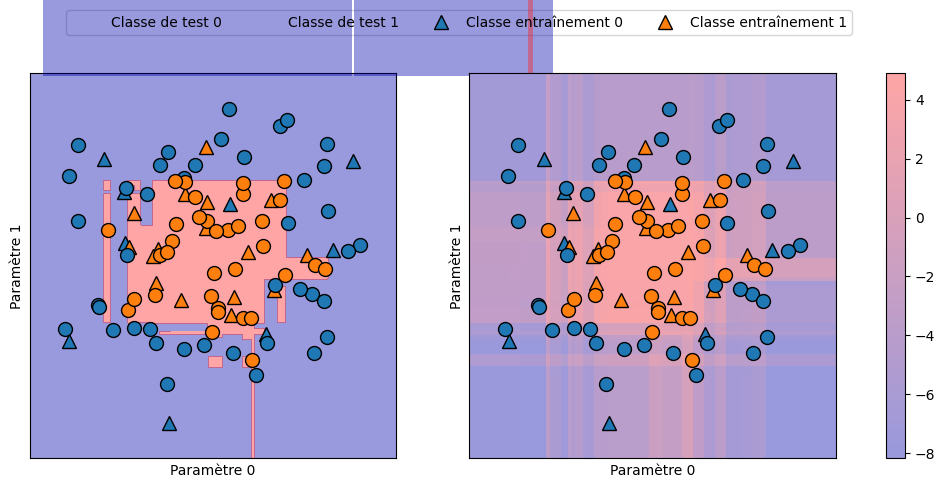

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt;
import numpy as np;
import mglearn

# Depuis les données circles avec un GBRT 

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X,y = make_circles(noise=0.25, factor=0.5, random_state=1)
y_named = np.array(["bleu","rouge"])[y]

X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X,y_named,y,random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train_named)

fig, axes = plt.subplots(1,2,figsize=(13,5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2 )
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                           alpha=.4,cm=mglearn.ReBl)

for ax in axes:
    mglearn.discrete_scatter(X_test[:,0], X_test[:,1],y_test,markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train,markers='o', ax=ax)
    ax.set_xlabel("Paramètre 0")
    ax.set_ylabel("Paramètre 1")
    
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
#cbar.draw_all()
fig.draw_without_rendering()
axes[0].legend(["Classe de test 0", "Classe de test 1","Classe entraînement 0","Classe entraînement 1"],
              ncol=4,loc=(0.1,1.1))

# Frontière de décision à gauche, fonction de décision à droite

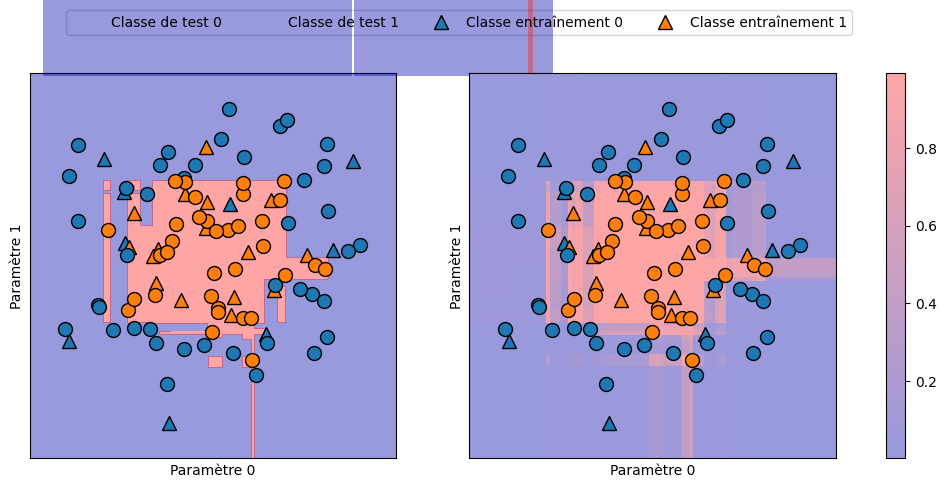

In [5]:
fig, axes = plt.subplots(1,2,figsize=(13,5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2 )
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                           alpha=.4,cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    mglearn.discrete_scatter(X_test[:,0], X_test[:,1],y_test,markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train,markers='o', ax=ax)
    ax.set_xlabel("Paramètre 0")
    ax.set_ylabel("Paramètre 1")
    
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
#cbar.draw_all()
fig.draw_without_rendering()
axes[0].legend(["Classe de test 0", "Classe de test 1","Classe entraînement 0","Classe entraînement 1"],
              ncol=4,loc=(0.1,1.1))

# à gauche frontière de décision, à droite probabilités prédites